In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')

In [2]:
default = pd.read_csv(r'D:\Simplilearn all projects\Data\default.csv')

In [3]:
default.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
default.shape

(10000, 5)

In [5]:
default = default.drop(['Index'],axis=1)

In [6]:
np.round(default.describe(),2)

,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00,10000.00,10000.00,10000.00
mean,0.71,10024.50,402203.78,0.03
std,0.46,5804.58,160039.67,0.18
min,0.00,0.00,9263.64,0.00
25%,0.00,5780.79,256085.52,0.00
50%,1.00,9883.62,414631.74,0.00
75%,1.00,13995.66,525692.76,0.00
max,1.00,31851.84,882650.76,1.00


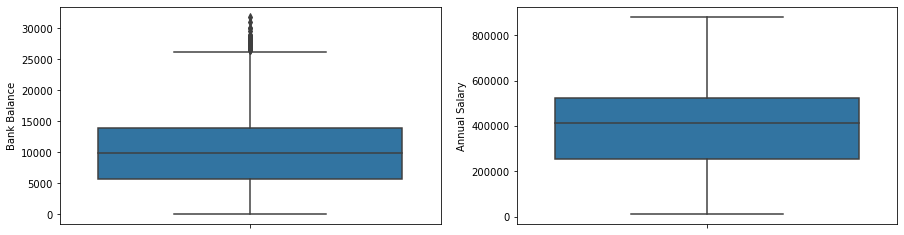

In [7]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.boxplot(y=default['Bank Balance'])
plt.subplot(1,2,2)
sns.boxplot(y=default['Annual Salary'])
plt.show()

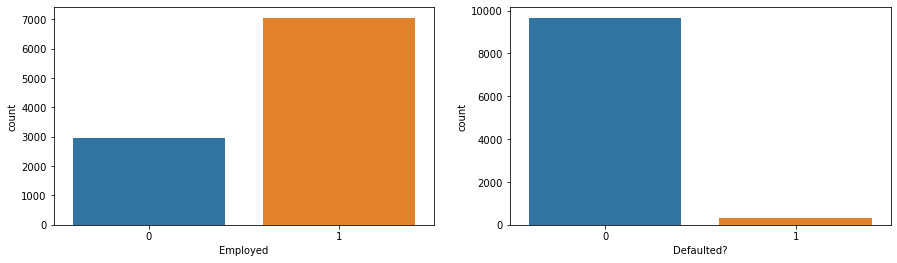

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(default['Employed'])
plt.subplot(1,2,2)
sns.countplot(default['Defaulted?'])
plt.show()

In [9]:
default['Employed'].value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [10]:
default['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [11]:
default['Employed'].value_counts(normalize=True)

1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [12]:
default['Defaulted?'].value_counts(normalize=True)

0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

### Bivariate Analyze

<AxesSubplot:xlabel='Defaulted?', ylabel='Annual Salary'>

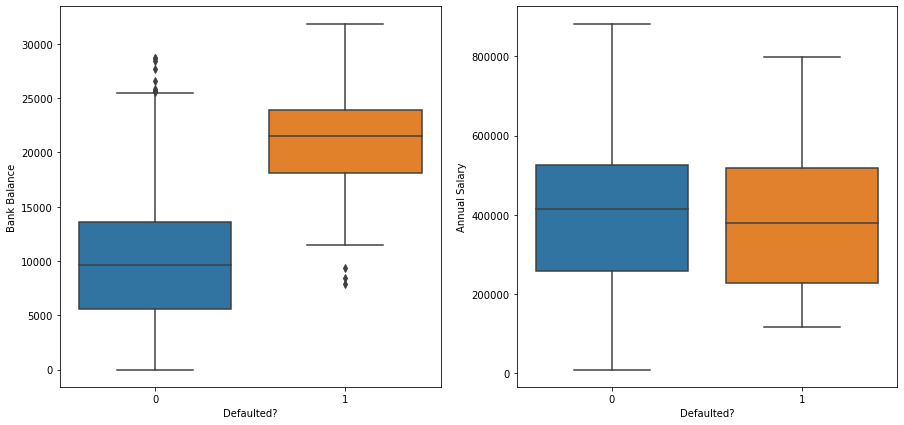

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(default['Defaulted?'],default['Bank Balance'])
plt.subplot(1,2,2)
sns.boxplot(default['Defaulted?'],default['Annual Salary'])

In [14]:
pd.crosstab(default['Employed'], default['Defaulted?'], normalize='index').round(2)

Defaulted?,0,1
Employed,,
0,0.96,0.04
1,0.97,0.03


<AxesSubplot:>

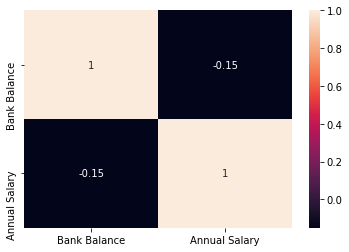

In [15]:
sns.heatmap(np.round(default[['Bank Balance','Annual Salary']].corr(),2), annot=True)

In [16]:
default.isna().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

### Treating with the outliers

In [17]:
Q1,Q3 = default['Bank Balance'].quantile([.25,.75])
IQR = Q3-Q1
LL = Q1-1.5*(IQR)
UL = Q3+1.5*(IQR)

In [18]:
LL

-6541.5149999999985

In [19]:
UL

26317.964999999997

In [20]:
df = default[default['Bank Balance']>UL]
df

,Employed,Bank Balance,Annual Salary,Defaulted?
173,0,26469.60,171257.88,1
1136,1,29988.24,618051.48,1
1160,0,30032.16,179370.24,1
1359,1,26651.64,488701.20,1
1502,0,27994.56,141242.76,1
1609,0,27239.40,216253.32,1
2096,0,27142.20,240362.04,1
2140,0,27706.68,229323.24,0
2929,0,28647.72,339562.92,1
3162,0,28983.84,209154.00,1


In [21]:
df['Bank Balance'].count()

31

In [22]:
df['Defaulted?'].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: Defaulted?, dtype: float64

In [23]:
df['Defaulted?'].value_counts()

1    26
0     5
Name: Defaulted?, dtype: int64

In [24]:
default['Bank Balance'] = np.where(default['Bank Balance'] > UL, UL, default['Bank Balance'])

<AxesSubplot:xlabel='Annual Salary'>

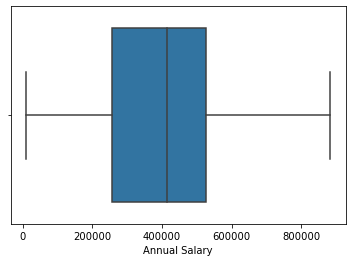

In [25]:
sns.boxplot(default['Annual Salary'])

In [26]:
default.head(2)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0


In [27]:
x = default.drop(['Defaulted?'],axis=1)
y = default['Defaulted?']

In [28]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Defaulted?, Length: 10000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25, random_state=32)

In [30]:
print(x_train.shape)
print(x_test.shape)

(7500, 3)
(2500, 3)


In [31]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.9644
1    0.0356
Name: Defaulted?, dtype: float64
0    0.9736
1    0.0264
Name: Defaulted?, dtype: float64


In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy=0.75)
x_res,y_res = sm.fit_resample(x_train,y_train)

In [33]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_res,y_res)

LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
accuracy_score(y_test,lr.predict(x_test))

0.7184

In [35]:
confusion_matrix(y_test,lr.predict(x_test))

array([[1752,  682],
       [  22,   44]], dtype=int64)